In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

# Chapter 7 - Introduction to Qiskit

In [2]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit import Aer, execute
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator


In [3]:
# Create a quantum circuit with 1 qubit, add an H gate
qc = QuantumCircuit(1)
qc.h(0)
# Set backend to unitary simulator
simulator = Aer.get_backend('unitary_simulator')
# Execute on unitary simulator
result = execute(qc, simulator).result()
# Obtain results and print it out on console
unitaryState = result.get_unitary(qc)
print(unitaryState)


Operator([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
          [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j]],
         input_dims=(2,), output_dims=(2,))


# Setup IBMQ Account info on local machine 

In [4]:
from qiskit import IBMQ
#IBMQ.save_account(‘PASTE-API-TOKEN-HERE’)
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairo

In [6]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit.tools.monitor import job_monitor

#You only need to load your account ONCE for each notebook. 
IBMQ.load_account()

q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.h(0)
qc.measure([0],[0])
# Specify a backend from the list available to you, 
# In this example we will use ibmq_’valencia’
backend = provider.get_backend('ibmq_lima')
job_object = execute(qc, backend)
job_monitor(job_object)


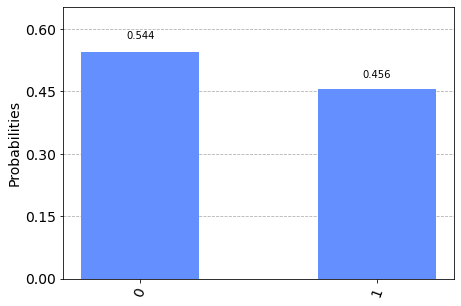

In [8]:
from qiskit.visualization import plot_histogram
result = job_object.result()
counts = result.get_counts(qc)
plot_histogram(counts)


In [9]:
import qiskit.tools.jupyter
%qiskit_version_table